# Exploratory Data Analysis Global Vaccination SARS-CoV-2 (Covid19)
***

** Source **: https://ourworldindata.org/

The first time a person is infected with the virus that causes COVID-19, it can take several days or weeks for his or her body to develop and use all the tools it needs to fight off the germs and overcome the infection. After infection, the person's immune system remembers what it learned about how to protect the body from disease.

COVID-19 vaccines help our body develop immunity to the virus that causes COVID-19 without us having to get the disease.

** Hypothesis **: **Positive** global reaction to covid-19 vaccines.

In [2]:
#importamos librerias necesarias
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline


In [3]:
# Algunas configuraciones de los paquetes
sns.set(color_codes = True)
pd.set_option("display.max_rows", 500)

# para eliminar los warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#cargamos los datos de las vacunas a nivel mundial por paises
df = pd.read_csv("country_vaccinations.csv")

#cargamos los datos de las vacunas a nivel mundia por marcas de vacunas
df_manufacturer = pd.read_csv("country_vaccinations_by_manufacturer.csv")

In [5]:
#conociendo el dataset
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20923 entries, 0 to 20922
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              20923 non-null  object 
 1   iso_code                             20923 non-null  object 
 2   date                                 20923 non-null  object 
 3   total_vaccinations                   11946 non-null  float64
 4   people_vaccinated                    11170 non-null  float64
 5   people_fully_vaccinated              8675 non-null   float64
 6   daily_vaccinations_raw               9934 non-null   float64
 7   daily_vaccinations                   20705 non-null  float64
 8   total_vaccinations_per_hundred       11946 non-null  float64
 9   people_vaccinated_per_hundred        11170 non-null  float64
 10  people_fully_vaccinated_per_hundred  8675 non-null   float64
 11  daily_vaccinations_per_milli

In [7]:
df.shape

(20923, 15)

In [8]:
df['date'] # tenemos que cambiar las fechas a mes, día, año para que pueda funcionar y poder hacer nuestro diagrama de visualizacion de mapas

0        2021-02-22
1        2021-02-23
2        2021-02-24
3        2021-02-25
4        2021-02-26
            ...    
20918    2021-05-24
20919    2021-05-25
20920    2021-05-26
20921    2021-05-27
20922    2021-05-28
Name: date, Length: 20923, dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m-%d-%Y')

df['date']

0        02-22-2021
1        02-23-2021
2        02-24-2021
3        02-25-2021
4        02-26-2021
            ...    
20918    05-24-2021
20919    05-25-2021
20920    05-26-2021
20921    05-27-2021
20922    05-28-2021
Name: date, Length: 20923, dtype: object

In [10]:
#conociendo las columnas
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [11]:
#se ordena las columnas
df = df.sort_values(['date', 'country'], ascending=True)

In [12]:
#valores NAN. Hay muchos los rellenamos con el valor anterior o con "0"

df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      8977
people_vaccinated                       9753
people_fully_vaccinated                12248
daily_vaccinations_raw                 10989
daily_vaccinations                       218
total_vaccinations_per_hundred          8977
people_vaccinated_per_hundred           9753
people_fully_vaccinated_per_hundred    12248
daily_vaccinations_per_million           218
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [13]:
df = df.groupby('country').apply(lambda group: group.fillna(method='ffill'))
df = df.groupby('country').apply(lambda group: group.fillna(0))

In [14]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
660,Argentina,ARG,01-01-2021,0.0,0.0,0.0,0.0,11070.0,0.00,0.00,0.0,245.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1031,Austria,AUT,01-01-2021,5033.0,5033.0,0.0,6.0,860.0,0.06,0.06,0.0,95.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
1390,Bahrain,BHR,01-01-2021,59351.0,59351.0,0.0,708.0,1258.0,3.49,3.49,0.0,739.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Health,https://healthalert.gov.bh/en/
1765,Belarus,BLR,01-01-2021,0.0,0.0,0.0,0.0,403.0,0.00,0.00,0.0,43.0,"Sinopharm/Beijing, Sputnik V",World Health Organization,https://covid19.who.int/
1912,Belgium,BEL,01-01-2021,813.0,813.0,17.0,8.0,128.0,0.01,0.01,0.0,11.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Sciensano,https://epistat.wiv-isp.be/covid/


<AxesSubplot:xlabel='total_vaccinations'>

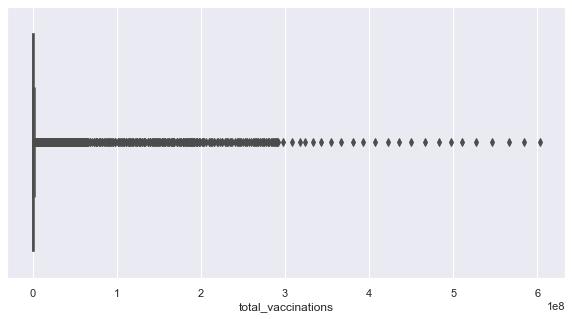

In [15]:
#interpretamos los outliers
plt.figure(figsize=(10,5))
sns.boxplot(df['total_vaccinations'])

<AxesSubplot:xlabel='people_vaccinated'>

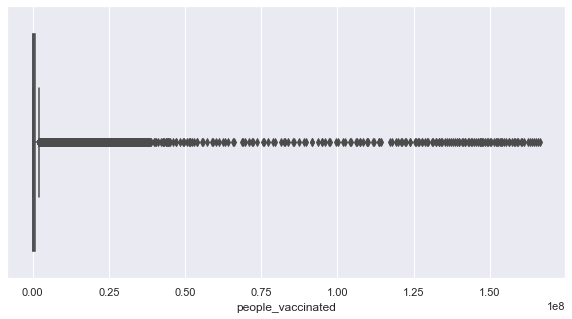

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(df['people_vaccinated']) #con una sola dosis de vacuna

<AxesSubplot:xlabel='people_fully_vaccinated'>

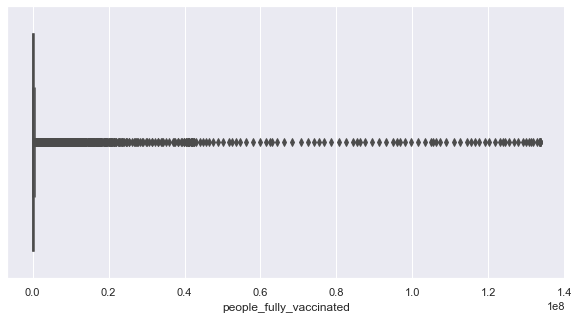

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(df['people_fully_vaccinated']) #con dosis completa de vacuna

In [18]:
df['vaccines'].value_counts() #las vacunas mas usadas

Oxford/AstraZeneca                                                                    3670
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         2985
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          1630
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1602
Moderna, Pfizer/BioNTech                                                              1253
Pfizer/BioNTech                                                                       1214
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                          1028
Oxford/AstraZeneca, Sinopharm/Beijing                                                  905
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      904
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                                 403
Oxford/AstraZeneca, Sputnik V                                                          357

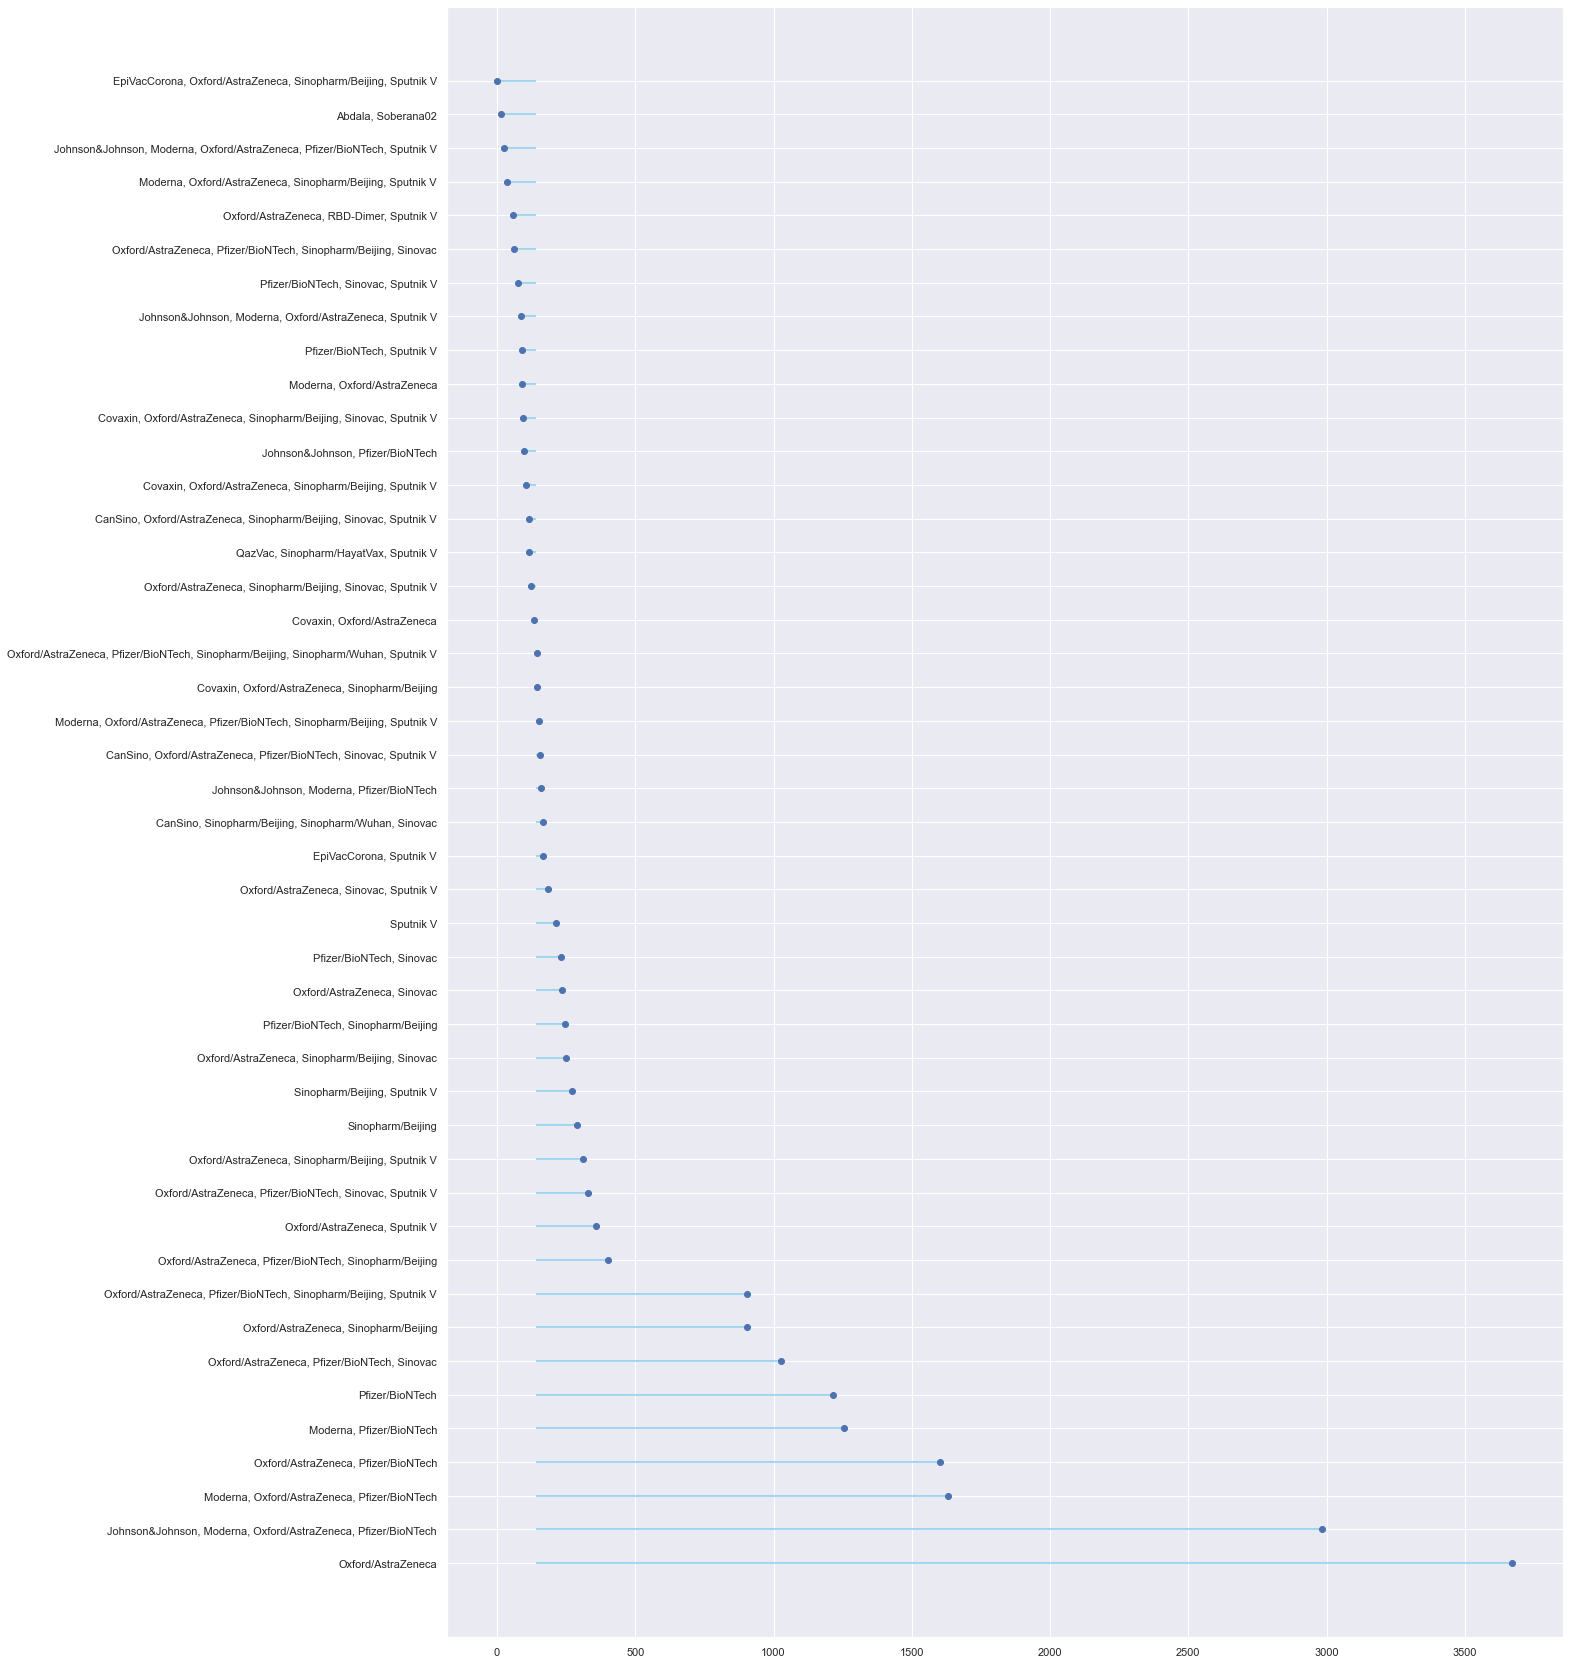

In [19]:
conteo = df['vaccines'].value_counts()
#aquí pintamos dos gráficos, uno con hlines para las líneas horizontales y otro para los puntos
plt.figure(figsize=(20,30))
plt.hlines(y = conteo.index,
          xmin=140,
          xmax=conteo,
          color= 'skyblue')
plt.plot(conteo, conteo.index, "o")

In [20]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [25]:
df["country"]

660          Argentina
1031           Austria
1390           Bahrain
1765           Belarus
1912           Belgium
             ...      
15823           Russia
16744         Scotland
17617         Slovenia
18539           Sweden
20099    United States
Name: country, Length: 20923, dtype: object

In [26]:
df2 = df[df['country'].isin(['Spain', 'Germany', 'France',"Italy","Portugal"])]
df2 = df2.groupby(['country', 'date']).sum()
df2.reset_index(inplace=True)
df2

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,France,01-01-2021,466.0,466.0,0.0,66.0,89.0,0.00,0.00,0.00,1.0
1,France,01-02-2021,542.0,542.0,0.0,76.0,87.0,0.00,0.00,0.00,1.0
2,France,01-03-2021,631.0,631.0,0.0,89.0,87.0,0.00,0.00,0.00,1.0
3,France,01-04-2021,2103.0,2103.0,0.0,1472.0,288.0,0.00,0.00,0.00,4.0
4,France,01-05-2021,7487.0,7487.0,0.0,5384.0,1041.0,0.01,0.01,0.00,15.0
...,...,...,...,...,...,...,...,...,...,...,...
750,Spain,05-23-2021,24534056.0,16709939.0,8130648.0,459280.0,317281.0,52.47,35.74,17.39,6786.0
751,Spain,05-24-2021,24876302.0,16953205.0,8250814.0,342246.0,326994.0,53.21,36.26,17.65,6994.0
752,Spain,05-25-2021,25280864.0,17187731.0,8434233.0,404562.0,329558.0,54.07,36.76,18.04,7049.0
753,Spain,05-26-2021,25745178.0,17487591.0,8614678.0,464314.0,320299.0,55.06,37.40,18.43,6851.0


<AxesSubplot:xlabel='date', ylabel='daily_vaccinations'>

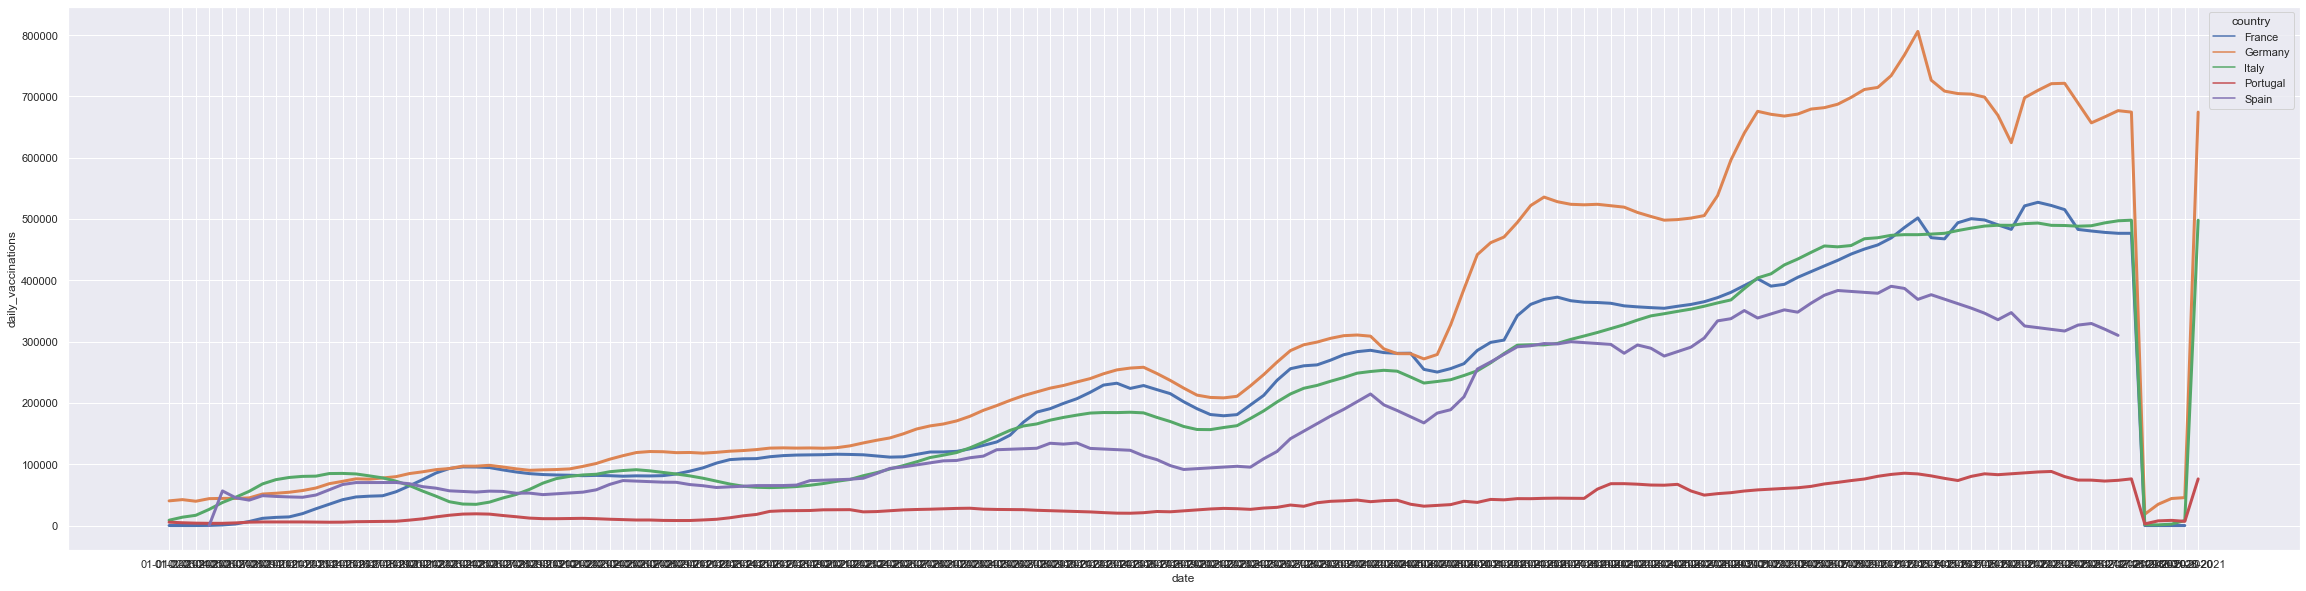

In [33]:
plt.figure(figsize=(40,10))
sns.lineplot(data = df2,
            x = 'date',
            y = 'daily_vaccinations',
            hue = 'country',
            linewidth = 3)

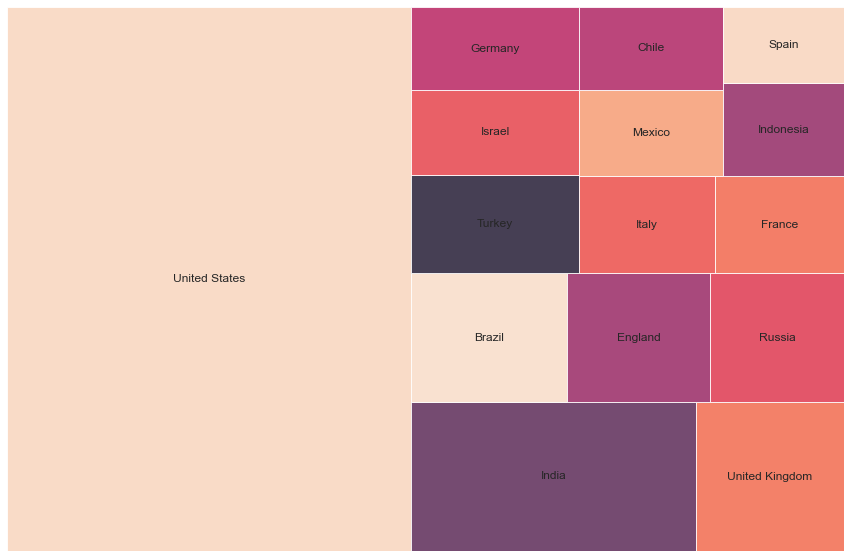

In [34]:
import squarify
plt.figure(figsize=(15,10))
data = df.groupby("country").sum()['people_fully_vaccinated'].sort_values(ascending=False)[:15]

squarify.plot(sizes=data.values,
             label=data.index,
             alpha=.8)
plt.axis('off')
plt.show()

<AxesSubplot:>

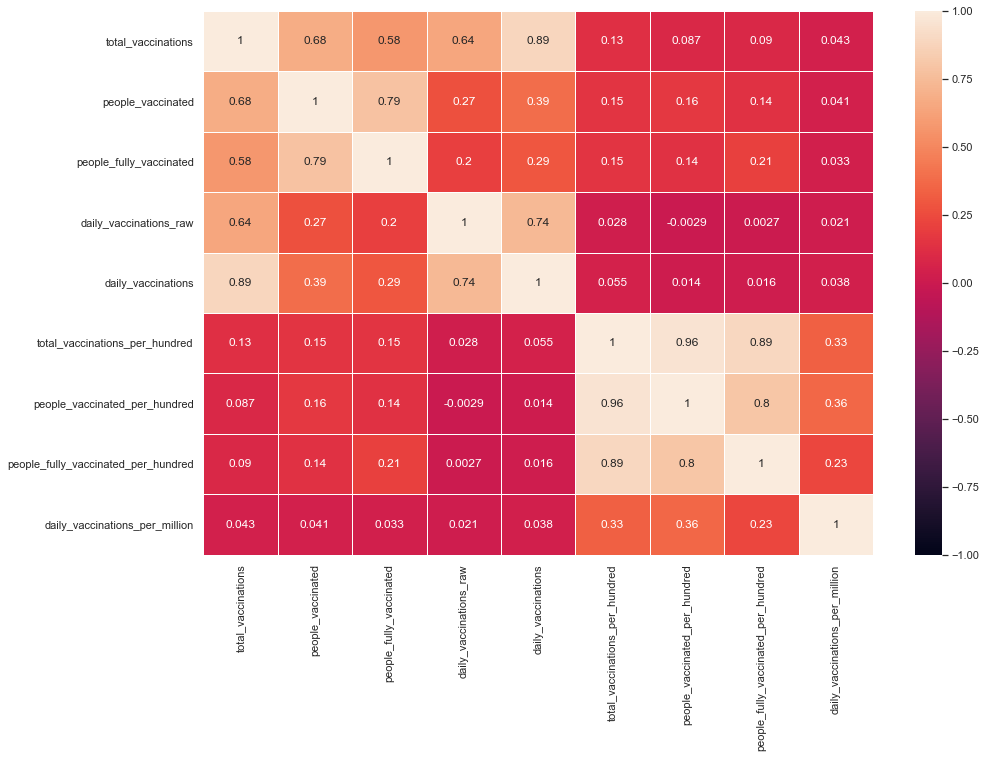

In [37]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)  #diagrama de correlación

In [43]:
#serie temporal
from quickda.explore_time_series import *

eda_timeseries(df, x= "date" , y = "total_vaccinations_per_hundred")

Distribution - Time Series Data
